In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta
import seaborn as sns



In [2]:
#batch processing for one station
pattern= {'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/data_demo/water_exp/MACROCOSM-5*.25O'}
outputdir={'MACROCOSM-5':'data_demo/water_exp/nc/', }
keepvars=['S1C','S1X','S2C','S2X']
gv.preprocess(pattern,interval='15S',keepvars=keepvars,outputdir=outputdir)

MACROCOSM-5_raw_202501112028.nc already exists, skipping.. (pass overwrite=True to overwrite)
MACROCOSM-5_raw_202501112228.nc already exists, skipping.. (pass overwrite=True to overwrite)
MACROCOSM-5_raw_202501111928.nc already exists, skipping.. (pass overwrite=True to overwrite)
MACROCOSM-5_raw_202501112128.nc already exists, skipping.. (pass overwrite=True to overwrite)
MACROCOSM-5_raw_202501111229.nc already exists, skipping.. (pass overwrite=True to overwrite)


In [9]:
pattern={'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/extracted/MACROCOSM-5/MACROCOSM-5/nc/*.nc',
        'MACROCOSM-2':'/Volumes/coraldelmar/march_collection/MACROCOSM-2/nc/MACROCOSM-2_raw_2025011/*.nc'}

In [20]:
startday = pd.to_datetime('10-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=2, freq='H', closed='left')
timeintervals

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_16477/3115796096.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timeintervals=pd.interval_range(start=startday, periods=2, freq='H', closed='left')


IntervalIndex([[2025-01-10 00:00:00, 2025-01-10 01:00:00), [2025-01-10 01:00:00, 2025-01-10 02:00:00)], dtype='interval[datetime64[ns], left]')

Checking: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/*.nc
Found 5 files for MACROCOSM-5
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501111229.nc
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501111928.nc
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501112228.nc
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501112128.nc
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501112028.nc
✅ Data loaded for MACROCOSM-5, shape: (60958, 6)
Checking: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/*.nc
Found 2 files for MACROCOSM-2
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/MACROCOSM-2_raw_202501132108.nc
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/MACROCOSM-2_raw_202501112108.nc
✅ Data loaded for MACRO

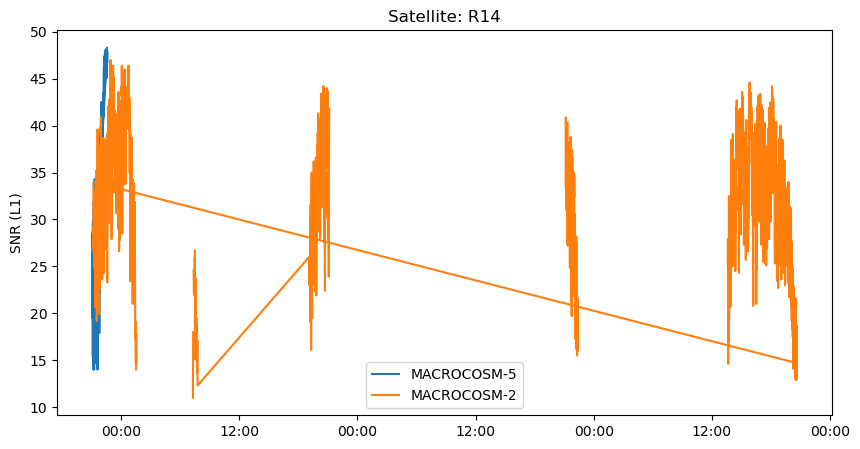

In [6]:
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Define paths for multiple stations
station_names = ['MACROCOSM-5', 'MACROCOSM-2']
base_path = '/Volumes/coraldelmar/gnss.vod/water_exp/nc'

# Dictionary to store data from both stations
data_dict = {}

# Define the satellite of interest
mySV = 'R14'

# Process files for each station
for station in station_names:
    path = f'{base_path}/{station}/*.nc'  # Adjusted to match correct structure
    nc_files = glob.glob(path)

    print(f"Checking: {path}")
    print(f"Found {len(nc_files)} files for {station}")

    if not nc_files:
        print(f"⚠️ No files found for {station}! Check if the path is correct.")
        continue  # Skip to the next station if no files are found

    dfs = []  # List to store dataframes
    
    for file in nc_files:
        print(f"Processing file: {file}")
        ds = xr.open_dataset(file)
        df = ds.to_dataframe().dropna(how='all')
        df = df.reorder_levels(["Epoch", "SV"]).sort_index()
        dfs.append(df)

    if dfs:
        data_dict[station] = pd.concat(dfs)  # Merge all files into one dataframe per station
        print(f"✅ Data loaded for {station}, shape: {data_dict[station].shape}")
    else:
        print(f"⚠️ WARNING: No valid data found for {station}")

# Plot
fig, ax = plt.subplots(1, figsize=(10, 5))

for station in station_names:
    if station in data_dict and not data_dict[station].empty:
        if mySV in data_dict[station].index.get_level_values('SV'):
            subdf = data_dict[station].xs(mySV, level='SV')
            ax.plot(subdf.index.get_level_values('Epoch'), subdf.S1C, label=station)
            print(f"📊 Plotted {station} for {mySV}, {len(subdf)} points.")
        else:
            print(f"⚠️ WARNING: {mySV} not found in {station} data.")
    else:
        print(f"⚠️ WARNING: No data for {station} to plot.")

# Format x-axis
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'Satellite: {mySV}')
plt.show()


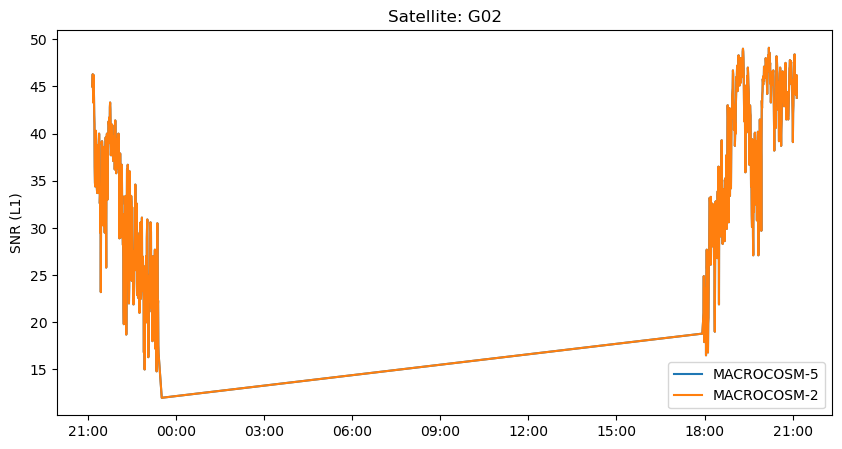

In [4]:
mySV = 'G02'  #

station_names = ['MACROCOSM-5','MACROCOSM-2'] 

fig, ax = plt.subplots(1, figsize=(10, 5))

for i, iname in enumerate(station_names):
    subdf = df.xs(mySV, level='SV') 
    hs = ax.plot(subdf.index.get_level_values('Epoch'), subdf.S1C, label=iname)

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'Satellite: {mySV}')

plt.show()



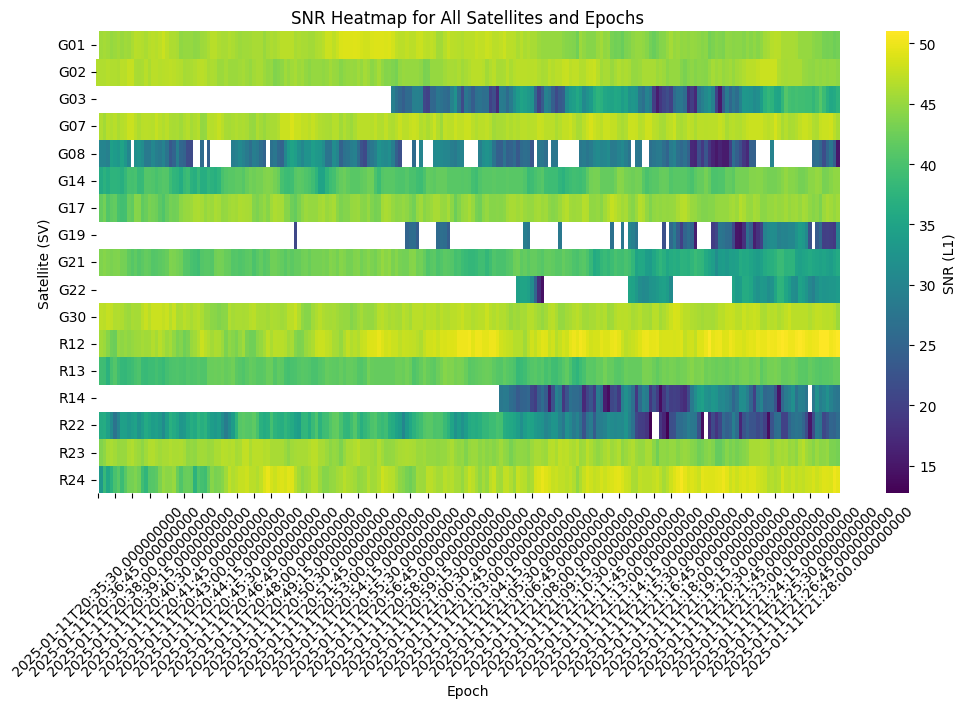

In [26]:
# SV as rows 
heatmap_data = df.pivot_table(index='SV', columns='Epoch', values='S1C')

# plotting
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'SNR (L1)'})
plt.title('SNR Heatmap for All Satellites and Epochs')
plt.xlabel('Epoch')
plt.ylabel('Satellite (SV)')
plt.xticks(rotation=45)
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_16477/917260607.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


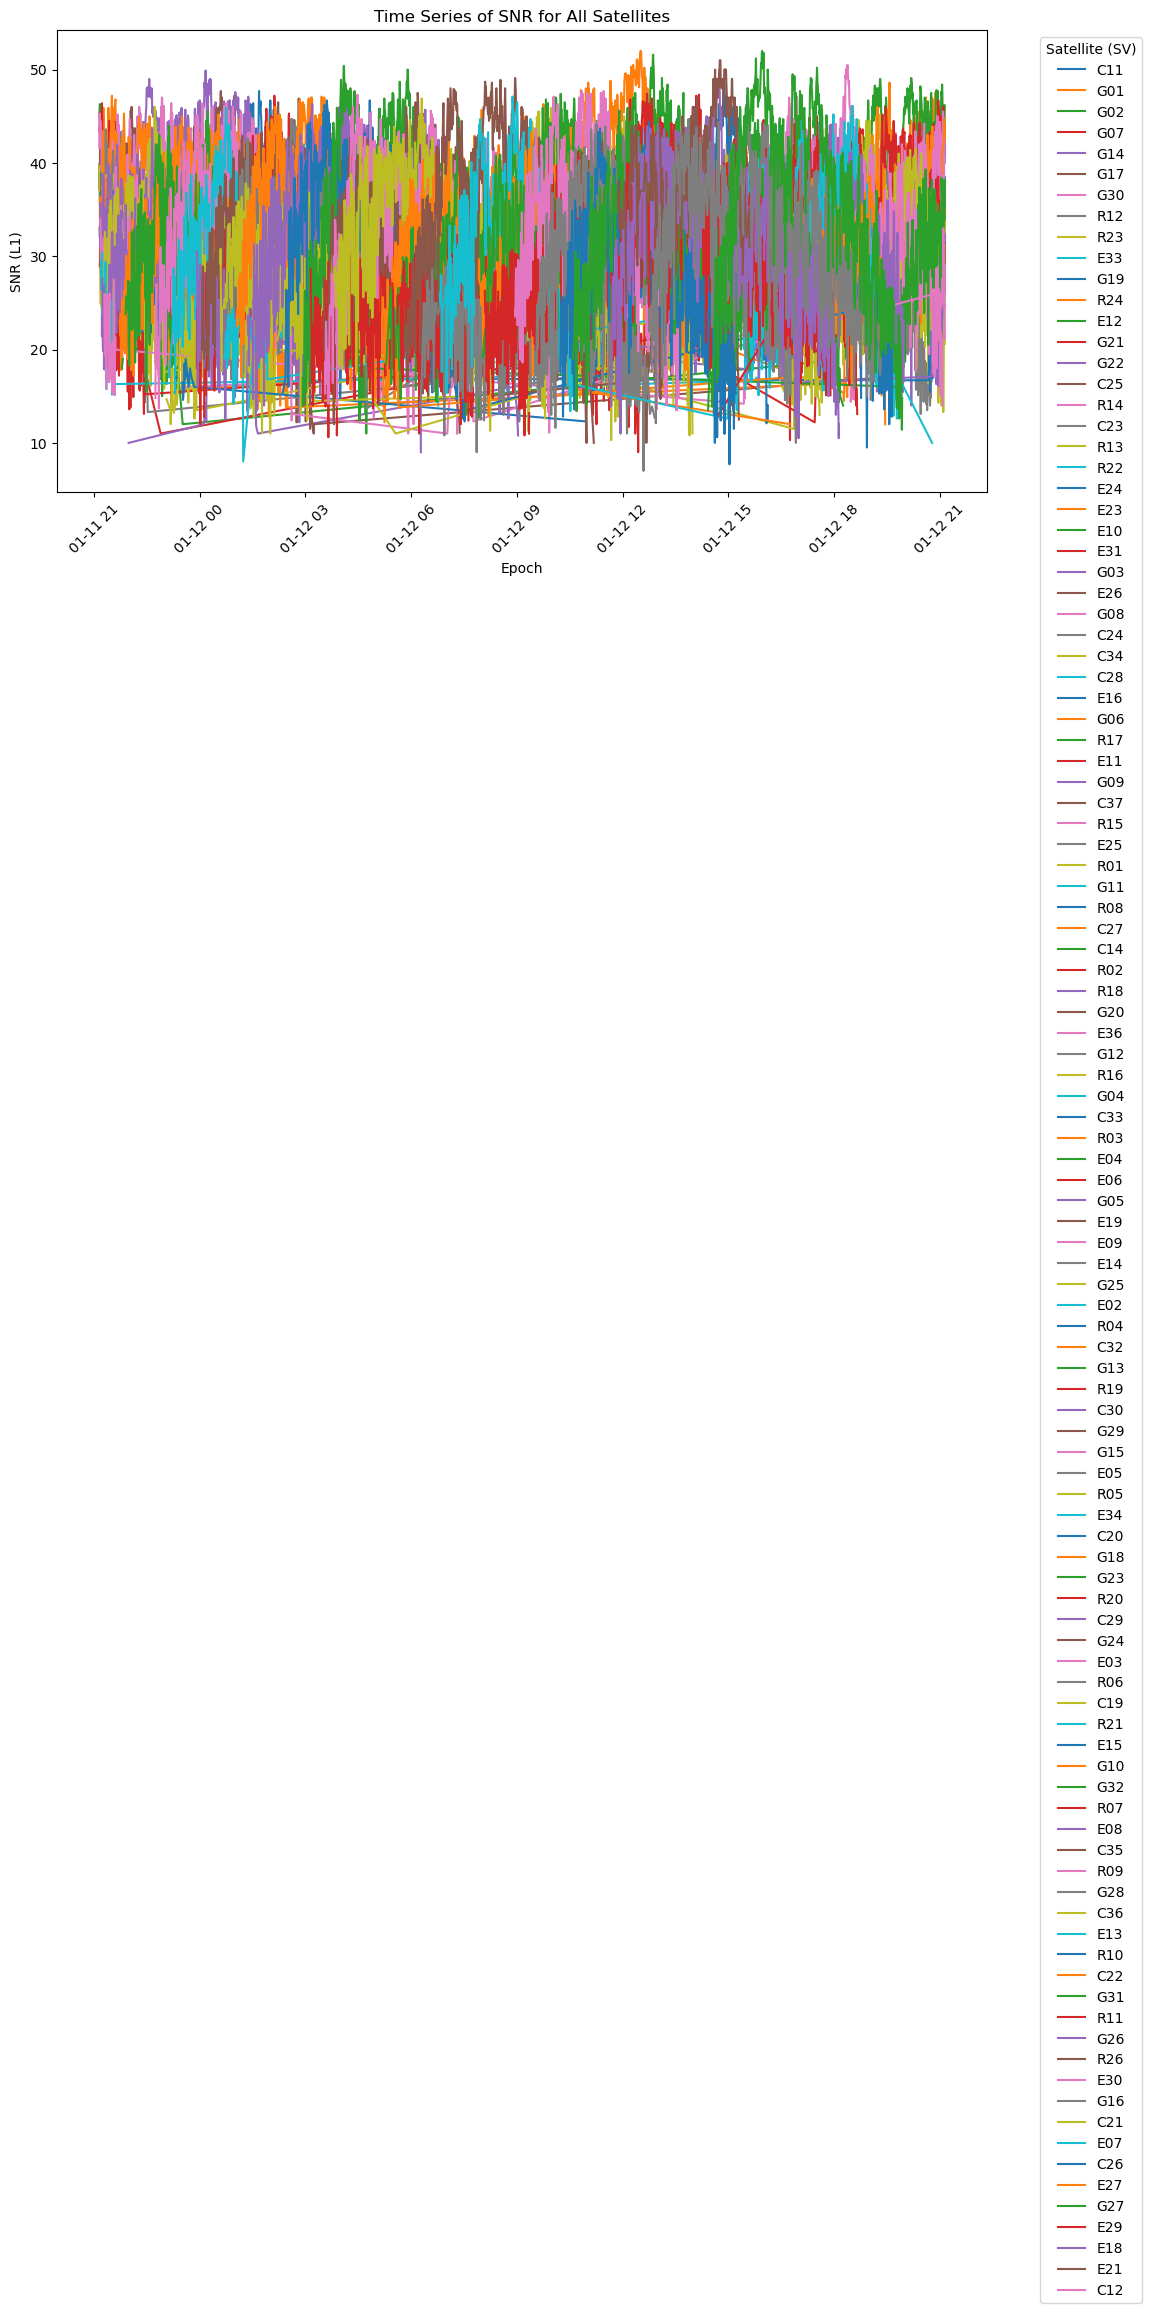

In [23]:
#time series for SNR for all satellotes
plt.figure(figsize=(12, 6))

# looping over each satellite (SV) and plot its SNR over time
for sv in df.index.get_level_values('SV').unique():
    subdf = df.xs(sv, level='SV')
    plt.plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=sv)

plt.xlabel('Epoch')
plt.ylabel('SNR (L1)')
plt.title('Time Series of SNR for All Satellites')
plt.xticks(rotation=45)
plt.legend(title='Satellite (SV)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


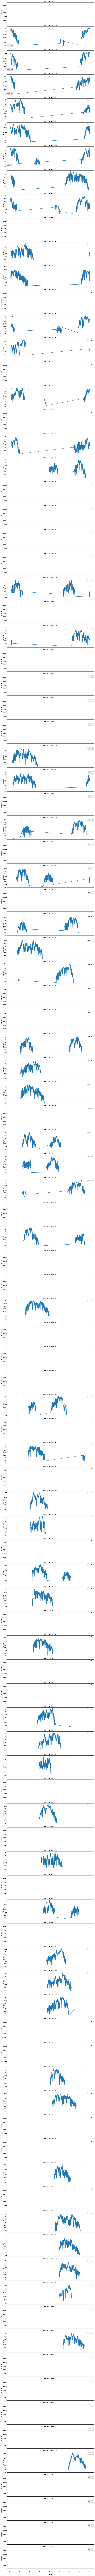

In [22]:
#  subplots to visualize SNR for each satellite with data
num_sv = len(df.index.get_level_values('SV').unique())
fig, axes = plt.subplots(num_sv, 1, figsize=(12, 3 * num_sv), sharex=True)
valid_axes = []
#plot each satellite
for i, sv in enumerate(df.index.get_level_values('SV').unique()):
    subdf = df.xs(sv, level='SV')
    
    # 
    if not subdf.empty:
        axes[i].plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=sv)
        axes[i].set_ylabel('SNR (L1)')
        axes[i].set_title(f'SNR for Satellite {sv}')
        axes[i].legend()
        valid_axes.append(i)  # Keep track of valid axes (those with data)

# removing empty subplots
for j in range(num_sv):
    if j not in valid_axes:
        fig.delaxes(axes[j])  

axes[-1].set_xlabel('Epoch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

